## An Incremental Algorithm for Signal Reconstruction from Short-Time Fourier Transform Magnitude
### Usage Example
The algorithm is very badly optimized therefore is very slow and useful for scientific purpose only

In [1]:
from sigrecon import *
from matplotlib import pylab as plt

Working parameters of the algorithm you can play with

In [35]:
n_fft = 32
hop_length = 4
win_length = 16
err_tol = 1e-02

Db level is for spectrogram image only, don't impact on the computations

In [36]:
min_level_db = -40
ref_level_db = 30

We set some positivity shift, it's crucial for success

In [37]:
# sound, sample_rate = load_wav('demo.wav')
sound = np.random.rand((10*hop_length))
s = sound[:10*hop_length] / 2 - np.min(sound / 16)
S = np.abs(stft(s, n_fft=n_fft, hop_length=hop_length, win_length=win_length))
print(S.shape)

(17, 7)


Plotting spectrogram in normalized Db scale

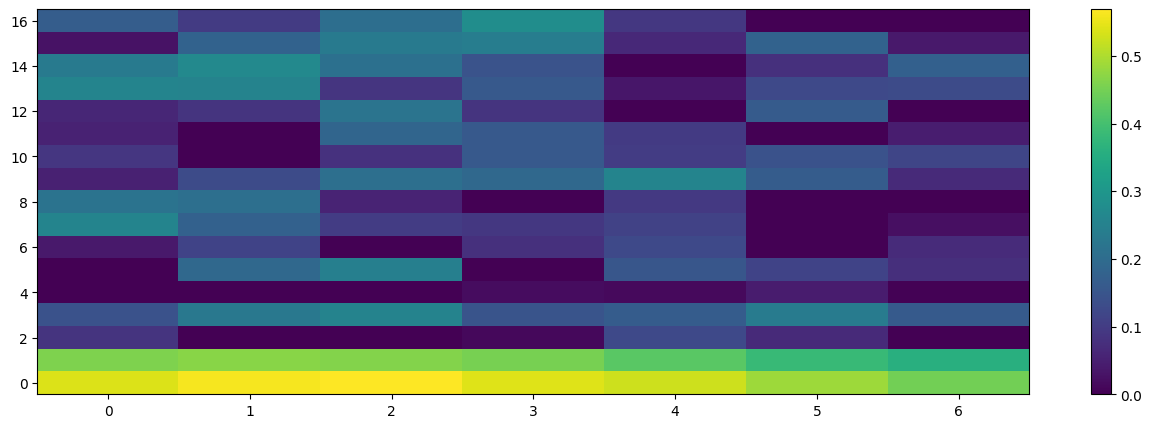

In [38]:
%matplotlib inline
S_db = normalize(amp_to_db(S) - ref_level_db, min_level_db)
plt.figure(figsize=(16,5))
plt.imshow(S_db, aspect='auto', origin='lower', interpolation='none')
plt.colorbar()

Reconstruct the signal and save it

In [48]:
%%time
y = signal_reconstruction(S, n_fft, hop_length, win_length, err_tol)

CPU times: user 11.7 ms, sys: 479 µs, total: 12.2 ms
Wall time: 11.3 ms


In [49]:
# from scipy.io.wavfile import write
# write("recon.wav", sample_rate, y)

In [50]:
print(y)
print(s)
print(np.mean(np.abs(y[:17000]-s[:17000])))
print(np.mean(np.abs(y[:17000]-s[:17000])/np.abs(s[:17000])))
print(np.max(np.abs(y[:17000]-s[:17000])))
print(np.min(np.abs(y[:17000]-s[:17000])))

[ 0.00228305 -0.05401223 -0.03622864 -0.03817799  0.05738411 -0.00869879
 -0.12901434  0.02698232  0.01659726  0.17606495 -0.06313074 -0.06168224
  0.2354373  -0.16952912  0.3074082   0.05312303  0.02256136 -0.13203714
 -0.08315752 -0.10647137  0.09698374 -0.08374835 -0.0425584  -0.0227105
  0.05428304 -0.06437521 -0.18792869  0.04472913  0.16800217  0.03577652
  0.14997409  0.18707929 -0.11004682 -0.01886337 -0.11347901 -0.066096
 -0.00258143 -0.00259814  0.0031211  -0.04066463]
[0.18746813 0.16915116 0.28093468 0.02397489 0.23200971 0.45825233
 0.20743462 0.16646473 0.16668748 0.48811608 0.32650322 0.13061826
 0.39280281 0.06782211 0.44613803 0.04882547 0.42101144 0.32413859
 0.15852114 0.169218   0.38733713 0.19056855 0.28050188 0.34458993
 0.18167325 0.02000388 0.20906472 0.1720402  0.1964954  0.06517188
 0.18443908 0.24922533 0.00269971 0.30635109 0.0628393  0.10591183
 0.25716375 0.28074757 0.20019973 0.189946  ]
0.2190414547802854
2.218527508534759
0.4669511190595561
0.004297562